# Hotel names

# Failure Analysis

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../../../../datasets/Hotels/search-tool/greek-hotels-2018-search.csv', delimiter=';')
data.replace(np.nan, '', inplace=True)
data.tail()

,Hotel City,Hotelname,Twitter Handle,Website,Facebook Handle
94,Stalis,Sergiani Garden Apartments,sergianistalis,https://sergiani.gr/,https://www.facebook.com/sergianistalis/
95,Stalis,Eurohotel Katrin Hotel & Bungalows,Katrinhotel,https://katrin-hotel.gr/en/,https://www.facebook.com/katrinhotel/
96,Tigaki,Hotel Gaia Village,Gaia_Village,https://www.gaia-hotels.com/gaia-village-hotel...,https://www.facebook.com/GaiaVillage
97,Tigaki,Hotel Gaia In Style,,https://www.gaia-hotels.com/gaia-instyle-hotel...,https://www.facebook.com/GaiaVillage
98,Tigaki,Hotel Tigaki’s Star,TigakisStar,https://www.tigakisstar.gr/,https://www.facebook.com/Tigakis-Star-Hotel-36...


In [8]:
res = pd.read_csv('Google-Search-hotelname-facebook.csv')
res = res.replace(np.nan, '')
res = res.rename(columns={'poi': 'Hotelname'})
res.head(5)

,Hotelname,Result 1,Result 2,Result 3,Result 4,Result 5,Result 6,Result 7,Result 8,Result 9,Result 10
0,Hotel Matoula,https://www.facebook.com/matoulabeachhotel/,https://www.facebook.com/pansionmatoula/,https://www.facebook.com/Storgi-Matoula-Gianno...,https://www.facebook.com/HotelDelfini/,https://www.facebook.com/Eurostar-Rent-A-Car-8...,https://www.facebook.com/EvoraSuitesCreta/,https://www.facebook.com/pages/category/Local-...,https://www.facebook.com/byannakouloumvaki/,,
1,Hotel Acharavi Beach,https://www.facebook.com/AcharaviBeachHotelCorfu/,https://www.facebook.com/pages/category/Hotel/...,https://www.facebook.com/AcharaviAphrodite/,https://www.facebook.com/vlachosaparts/,,,,,,
2,Hotel Kathrin Beach,https://www.facebook.com/katrinhotel/,https://www.facebook.com/beautifulmiamirealty/,,,,,,,,
3,Aelia Resort,https://www.facebook.com/aeliawellnessretreat/,https://www.facebook.com/AeliaResortRhodes/,https://www.facebook.com/pages/category/Hotel/...,https://www.facebook.com/aeliamykonos/,https://www.facebook.com/Aelia-Sivota-Apartmen...,,,,,
4,Hotel Alexander House,https://www.facebook.com/AHSpa/,https://www.facebook.com/AlexanderHotels/,https://www.facebook.com/alexanderhousehotel/,https://www.facebook.com/AlexanderHouseApartme...,https://www.facebook.com/alexanderoakridge/,,,,,


In [11]:
results = pd.merge(data, res, on = 'Hotelname', how='inner')

In [12]:
len(results)

101

In [13]:
results.to_csv('Google-search-hotelname-facebook-results.csv', index=False)

## Results
- Παραδοχές 

In [5]:
data = pd.read_csv('Google-search-hotelname-facebook-results-processed.csv', delimiter=';')

In [6]:
data.head()

,Hotel City,Hotelname,Account,Results,Found,Place
0,Acharavi,Hotel Matoula,False,True,False,-1
1,Acharavi,Hotel Acharavi Beach,True,True,True,1
2,Adelianos Kampos,Hotel Kathrin Beach,True,True,False,-1
3,Afandou,Aelia Resort,False,True,False,-1
4,Agia Pelagia,Hotel Alexander House,True,True,True,3


## With a Facebook Account 

In [27]:
with_acc= len(data[(data['Account'] == True)])

In [28]:
found_acc_count = len(data[(data['Account'] == True) & (data['Results'] == True) & (data['Found'] == True)])
not_found_count = len(data[(data['Account'] == True) & (data['Results'] == True) & (data['Found'] == False)])

In [18]:
top1 = len(data[(data['Account'] == True) & (data['Results'] == True) 
            & (data['Found'] == True) & (data['Place'] == 1)])

top5 = len(data[(data['Account'] == True) & (data['Results'] == True) 
            & (data['Found'] == True) & (data['Place'] > 1)])

[42, 7, 29]


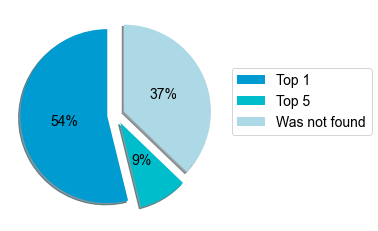

In [33]:
fig, ax = plt.subplots()
color_palette_list = ['#009BD0', '#00BDCC','#ADD8E6']

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=14

x = [top1, top5, not_found_count]
labels = ['Top 1', 'Top 5', 'Was not found']
_=ax.pie(x, colors=color_palette_list,
         autopct='%1.0f%%', shadow=True, startangle=90, pctdistance=0.5,labeldistance=1.3, explode=(0.1,0.1,0.1
))
ax.legend(frameon=True, bbox_to_anchor=(1,0.75), labels=labels)

print(x)

## Without a Twitter Account 

In [24]:
target_names = ['Has an Account', 'Does not have a Account']

In [25]:
correct = len(data[(data['Account'] == False) & (data['Results'] == False)])
incorrect = len(data[(data['Account'] == False) & (data['Results'] == True)])

## Final Results

In [34]:
fin_result = np.array([[found_acc_count, correct],
                      [not_found_count,incorrect]])
fin_result

array([[49,  0],
       [29, 21]])

<AxesSubplot:>

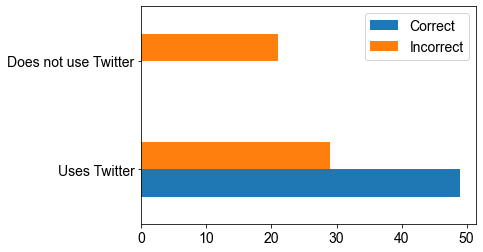

In [35]:
pd.DataFrame(fin_result, 
             columns=['Uses Twitter', 'Does not use Twitter'], 
             index=['Correct', 'Incorrect']).T.plot(kind='barh')

In [36]:
result = np.array([[0,21.],[29, 49.]])

In [37]:
target_names = ['Does not have an Account', 'Has an Account']

[Text(0, 0.5, 'Does not have an Account'), Text(0, 1.5, 'Has an Account')]

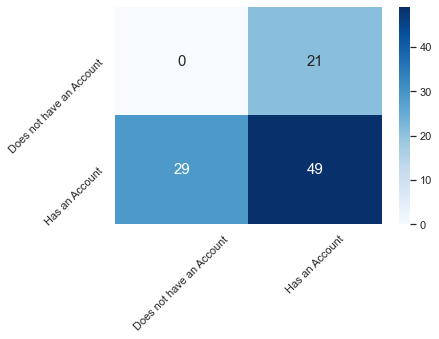

In [38]:
#plt.figure(figsize=(10,7))
sns.set(font_scale=1) # for label size
mtrx = sns.heatmap(result.round(), annot=True, annot_kws={"size": 15},
           cmap=plt.cm.Blues,
           xticklabels=target_names, 
            yticklabels=target_names,
            fmt='g') # font size

loc, labels = plt.xticks()
mtrx.set_xticklabels(labels, rotation=45)
mtrx.set_yticklabels(labels, rotation=45)

# Hotel names + Hotel city

# Failure Analysis

In [3]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('../../../../datasets/Hotels/search-tool/greek-hotels-2018-search.csv', delimiter=';')
data.replace(np.nan, '', inplace=True)
data.tail()

,Hotel City,Hotelname,Twitter Handle,Website,Facebook Handle
94,Stalis,Sergiani Garden Apartments,sergianistalis,https://sergiani.gr/,https://www.facebook.com/sergianistalis/
95,Stalis,Eurohotel Katrin Hotel & Bungalows,Katrinhotel,https://katrin-hotel.gr/en/,https://www.facebook.com/katrinhotel/
96,Tigaki,Hotel Gaia Village,Gaia_Village,https://www.gaia-hotels.com/gaia-village-hotel...,https://www.facebook.com/GaiaVillage
97,Tigaki,Hotel Gaia In Style,,https://www.gaia-hotels.com/gaia-instyle-hotel...,https://www.facebook.com/GaiaVillage
98,Tigaki,Hotel Tigaki’s Star,TigakisStar,https://www.tigakisstar.gr/,https://www.facebook.com/Tigakis-Star-Hotel-36...


In [5]:
res = pd.read_csv('Google-Search-hotelname-location-facebook.csv')
res = res.replace(np.nan, '')
res = res.rename(columns={'poi': 'Hotelname'})
res.head(5)

,Hotelname,Result 1,Result 2,Result 3,Result 4,Result 5,Result 6,Result 7,Result 8,Result 9,Result 10
0,Hotel Matoula Acharavi,https://www.facebook.com/philoxeniaguesthouse/,https://www.facebook.com/hotelphyllis/,https://www.facebook.com/thassossunrise/,,,,,,,
1,Hotel Acharavi Beach Acharavi,https://www.facebook.com/AcharaviBeachHotelCorfu/,https://www.facebook.com/AcharaviAphrodite/,https://www.facebook.com/acharavibeachvilla/,https://www.facebook.com/vlachosaparts/,,,,,,
2,Hotel Kathrin Beach Adelianos Kampos,https://www.facebook.com/StellaKatrinHotel/,https://www.facebook.com/alltours/,,,,,,,,
3,Aelia Resort Afandou,https://www.facebook.com/AeliaResortRhodes/,https://www.facebook.com/Olivetreefarmrhodes/,https://www.facebook.com/TheodoridisApartments/,https://www.facebook.com/solotour.zlin/,https://www.facebook.com/seaandsunvillage/,https://www.facebook.com/VillaPico/,https://www.facebook.com/elitozsuites/,https://www.facebook.com/obatimehotel/,,
4,Hotel Alexander House Agia Pelagia,https://www.facebook.com/alexanderhousehotel/,https://www.facebook.com/pelagiabayhotel/,https://www.facebook.com/derpartreisebuerogoslar/,https://www.facebook.com/taxiheraklio/,https://www.facebook.com/statusMLB/,,,,,


In [6]:
results = pd.merge(data, res, on = data.index, how='inner')

In [7]:
results

,key_0,Hotel City,Hotelname_x,Twitter Handle,Website,Facebook Handle,Hotelname_y,Result 1,Result 2,Result 3,Result 4,Result 5,Result 6,Result 7,Result 8,Result 9,Result 10
0,0,Acharavi,Hotel Matoula,,,,Hotel Matoula Acharavi,https://www.facebook.com/philoxeniaguesthouse/,https://www.facebook.com/hotelphyllis/,https://www.facebook.com/thassossunrise/,,,,,,,
1,1,Acharavi,Hotel Acharavi Beach,,https://www.acharavibeach.com/,https://www.facebook.com/AcharaviBeachHotelCorfu/,Hotel Acharavi Beach Acharavi,https://www.facebook.com/AcharaviBeachHotelCorfu/,https://www.facebook.com/AcharaviAphrodite/,https://www.facebook.com/acharavibeachvilla/,https://www.facebook.com/vlachosaparts/,,,,,,
2,2,Adelianos Kampos,Hotel Kathrin Beach,,https://kathrinbeach.com/,https://www.facebook.com/Kathrin-Beach-Hotel-1...,Hotel Kathrin Beach Adelianos Kampos,https://www.facebook.com/StellaKatrinHotel/,https://www.facebook.com/alltours/,,,,,,,,
3,3,Afandou,Aelia Resort,,,,Aelia Resort Afandou,https://www.facebook.com/AeliaResortRhodes/,https://www.facebook.com/Olivetreefarmrhodes/,https://www.facebook.com/TheodoridisApartments/,https://www.facebook.com/solotour.zlin/,https://www.facebook.com/seaandsunvillage/,https://www.facebook.com/VillaPico/,https://www.facebook.com/elitozsuites/,https://www.facebook.com/obatimehotel/,,
4,4,Agia Pelagia,Hotel Alexander House,,http://www.alexanderhouse.gr/en/,https://www.facebook.com/alexanderhousehotel,Hotel Alexander House Agia Pelagia,https://www.facebook.com/alexanderhousehotel/,https://www.facebook.com/pelagiabayhotel/,https://www.facebook.com/derpartreisebuerogoslar/,https://www.facebook.com/taxiheraklio/,https://www.facebook.com/statusMLB/,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,94,Stalis,Sergiani Garden Apartments,sergianistalis,https://sergiani.gr/,https://www.facebook.com/sergianistalis/,Sergiani Garden Apartments Stalis,https://www.facebook.com/panoramahotelstalis/,https://www.facebook.com/MaliaProject/,https://www.facebook.com/Sweettimestalis/,https://www.facebook.com/lichnosrestaurant/,https://www.facebook.com/seaforsun/,https://www.facebook.com/atriumkoutouloufari/,https://www.facebook.com/gennadisunapts/,,,
95,95,Stalis,Eurohotel Katrin Hotel & Bungalows,Katrinhotel,https://katrin-hotel.gr/en/,https://www.facebook.com/katrinhotel/,Eurohotel Katrin Hotel & Bungalows Stalis,https://www.facebook.com/katrinhotel/,https://www.facebook.com/katrinsuites/,https://www.facebook.com/eurohotelgroup/,https://www.facebook.com/arionpalacehotelcrete/,https://www.facebook.com/azuremare/,https://www.facebook.com/EasyAuto.gr/,,,,
96,96,Tigaki,Hotel Gaia Village,Gaia_Village,https://www.gaia-hotels.com/gaia-village-hotel...,https://www.facebook.com/GaiaVillage,Hotel Gaia Village Tigaki,https://www.facebook.com/GaiaVillage/,https://www.facebook.com/GaiaInStyle/,https://www.facebook.com/islandkos/,https://www.facebook.com/pages/category/Tour-A...,https://www.facebook.com/efesosbeachhotel/,https://www.facebook.com/AchilleasBeachHotel/,,,,
97,97,Tigaki,Hotel Gaia In Style,,https://www.gaia-hotels.com/gaia-instyle-hotel...,https://www.facebook.com/GaiaVillage,Hotel Gaia In Style Tigaki,https://www.facebook.com/GaiaInStyle/,https://www.facebook.com/GaiaVillage/,https://www.facebook.com/harmonycrestresort/,https://www.facebook.com/cestovniagenturamax/,https://www.facebook.com/efesosbeachhotel/,https://www.facebook.com/concepthotelmanagement/,,,,


In [8]:
results = results.drop(['key_0', 'Hotelname_y'], axis=1)

In [11]:
results

,Hotel City,Hotelname_x,Twitter Handle,Website,Facebook Handle,Result 1,Result 2,Result 3,Result 4,Result 5,Result 6,Result 7,Result 8,Result 9,Result 10
0,Acharavi,Hotel Matoula,,,,https://www.facebook.com/philoxeniaguesthouse/,https://www.facebook.com/hotelphyllis/,https://www.facebook.com/thassossunrise/,,,,,,,
1,Acharavi,Hotel Acharavi Beach,,https://www.acharavibeach.com/,https://www.facebook.com/AcharaviBeachHotelCorfu/,https://www.facebook.com/AcharaviBeachHotelCorfu/,https://www.facebook.com/AcharaviAphrodite/,https://www.facebook.com/acharavibeachvilla/,https://www.facebook.com/vlachosaparts/,,,,,,
2,Adelianos Kampos,Hotel Kathrin Beach,,https://kathrinbeach.com/,https://www.facebook.com/Kathrin-Beach-Hotel-1...,https://www.facebook.com/StellaKatrinHotel/,https://www.facebook.com/alltours/,,,,,,,,
3,Afandou,Aelia Resort,,,,https://www.facebook.com/AeliaResortRhodes/,https://www.facebook.com/Olivetreefarmrhodes/,https://www.facebook.com/TheodoridisApartments/,https://www.facebook.com/solotour.zlin/,https://www.facebook.com/seaandsunvillage/,https://www.facebook.com/VillaPico/,https://www.facebook.com/elitozsuites/,https://www.facebook.com/obatimehotel/,,
4,Agia Pelagia,Hotel Alexander House,,http://www.alexanderhouse.gr/en/,https://www.facebook.com/alexanderhousehotel,https://www.facebook.com/alexanderhousehotel/,https://www.facebook.com/pelagiabayhotel/,https://www.facebook.com/derpartreisebuerogoslar/,https://www.facebook.com/taxiheraklio/,https://www.facebook.com/statusMLB/,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Stalis,Sergiani Garden Apartments,sergianistalis,https://sergiani.gr/,https://www.facebook.com/sergianistalis/,https://www.facebook.com/panoramahotelstalis/,https://www.facebook.com/MaliaProject/,https://www.facebook.com/Sweettimestalis/,https://www.facebook.com/lichnosrestaurant/,https://www.facebook.com/seaforsun/,https://www.facebook.com/atriumkoutouloufari/,https://www.facebook.com/gennadisunapts/,,,
95,Stalis,Eurohotel Katrin Hotel & Bungalows,Katrinhotel,https://katrin-hotel.gr/en/,https://www.facebook.com/katrinhotel/,https://www.facebook.com/katrinhotel/,https://www.facebook.com/katrinsuites/,https://www.facebook.com/eurohotelgroup/,https://www.facebook.com/arionpalacehotelcrete/,https://www.facebook.com/azuremare/,https://www.facebook.com/EasyAuto.gr/,,,,
96,Tigaki,Hotel Gaia Village,Gaia_Village,https://www.gaia-hotels.com/gaia-village-hotel...,https://www.facebook.com/GaiaVillage,https://www.facebook.com/GaiaVillage/,https://www.facebook.com/GaiaInStyle/,https://www.facebook.com/islandkos/,https://www.facebook.com/pages/category/Tour-A...,https://www.facebook.com/efesosbeachhotel/,https://www.facebook.com/AchilleasBeachHotel/,,,,
97,Tigaki,Hotel Gaia In Style,,https://www.gaia-hotels.com/gaia-instyle-hotel...,https://www.facebook.com/GaiaVillage,https://www.facebook.com/GaiaInStyle/,https://www.facebook.com/GaiaVillage/,https://www.facebook.com/harmonycrestresort/,https://www.facebook.com/cestovniagenturamax/,https://www.facebook.com/efesosbeachhotel/,https://www.facebook.com/concepthotelmanagement/,,,,


In [12]:
results.to_csv('Google-search-hotelname-facebook-location-results.csv', index=False)

## Results
- Παραδοχές 

In [13]:
data = pd.read_csv('Google-search-hotelname-facebook-location-results-processed.csv', delimiter=';')

In [14]:
data.tail()

,Hotel City,Hotelname_x,Account,Results,Found,Place
94,Stalis,Sergiani Garden Apartments,True,True,False,-1
95,Stalis,Eurohotel Katrin Hotel & Bungalows,True,True,False,-1
96,Tigaki,Hotel Gaia Village,True,True,True,1
97,Tigaki,Hotel Gaia In Style,True,True,True,2
98,Tigaki,Hotel Tigaki’s Star,True,True,False,-1


## With a Facebook Account 

In [15]:
with_acc= len(data[(data['Account'] == True)])

In [16]:
found_acc_count = len(data[(data['Account'] == True) & (data['Results'] == True) & (data['Found'] == True)])
not_found_count = len(data[(data['Account'] == True) & (data['Results'] == True) & (data['Found'] == False)])

In [17]:
top1 = len(data[(data['Account'] == True) & (data['Results'] == True) 
            & (data['Found'] == True) & (data['Place'] == 1)])

top5 = len(data[(data['Account'] == True) & (data['Results'] == True) 
            & (data['Found'] == True) & (data['Place'] > 1)])

[44, 6, 27]


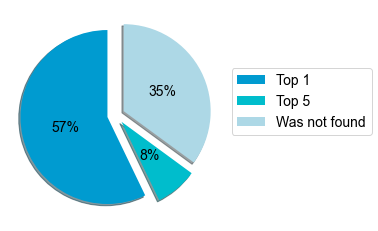

In [18]:
fig, ax = plt.subplots()
color_palette_list = ['#009BD0', '#00BDCC','#ADD8E6']

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor']= 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['font.size']=14

x = [top1, top5, not_found_count]
labels = ['Top 1', 'Top 5', 'Was not found']
_=ax.pie(x, colors=color_palette_list,
         autopct='%1.0f%%', shadow=True, startangle=90, pctdistance=0.5,labeldistance=1.3, explode=(0.1,0.1,0.1
))
ax.legend(frameon=True, bbox_to_anchor=(1,0.75), labels=labels)

print(x)

## Without a Twitter Account 

In [19]:
target_names = ['Has an Account', 'Does not have a Account']

In [20]:
correct = len(data[(data['Account'] == False) & (data['Results'] == False)])
incorrect = len(data[(data['Account'] == False) & (data['Results'] == True)])

## Final Results

In [21]:
fin_result = np.array([[found_acc_count, correct],
                      [not_found_count,incorrect]])
fin_result

array([[50,  2],
       [27, 19]])

<AxesSubplot:>

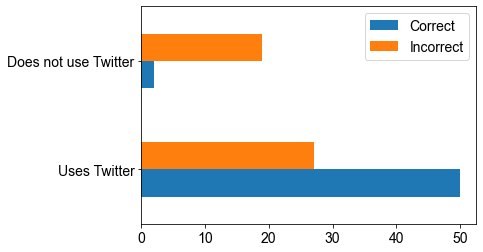

In [22]:
pd.DataFrame(fin_result, 
             columns=['Uses Twitter', 'Does not use Twitter'], 
             index=['Correct', 'Incorrect']).T.plot(kind='barh')

In [26]:
result = np.array([[2,19.],[27, 51.]])

In [27]:
target_names = ['Does not have an Account', 'Has an Account']

[Text(0, 0.5, 'Does not have an Account'), Text(0, 1.5, 'Has an Account')]

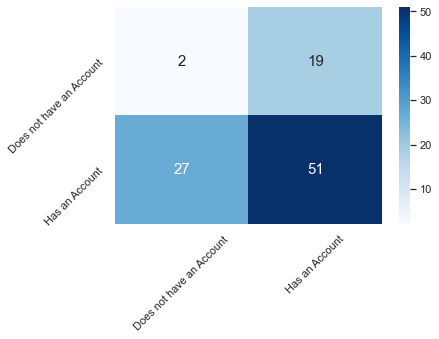

In [28]:
#plt.figure(figsize=(10,7))
sns.set(font_scale=1) # for label size
mtrx = sns.heatmap(result.round(), annot=True, annot_kws={"size": 15},
           cmap=plt.cm.Blues,
           xticklabels=target_names, 
            yticklabels=target_names,
            fmt='g') # font size

loc, labels = plt.xticks()
mtrx.set_xticklabels(labels, rotation=45)
mtrx.set_yticklabels(labels, rotation=45)